In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [46]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [47]:
X.head(6)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1
5,19.06,10.0,2.79805,2.59750,1,72.0,63,91,0,0,...,0,0,0,0,0,0,0,0,0,1


### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? (4б)** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [48]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [79]:
X.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,-0.049238,-0.011554,...,0.010783,-0.078761,-0.065450,-0.067025,-0.070772,-0.032169,0.006428,-0.009844,-0.027335,0.002173
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,-0.002355,0.004740,...,-0.020596,-0.023704,-0.005812,-0.038896,0.001861,-0.033298,-0.011319,0.001978,-0.021416,0.001326
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.002509,-0.033352,...,0.021958,-0.027208,-0.008661,-0.018124,-0.015995,-0.006097,0.003144,0.008153,-0.026124,0.000626
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,0.027020,-0.031793,...,0.055861,0.058156,0.012988,0.022421,0.012134,0.027700,0.033101,0.010281,0.018762,0.000468
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,-0.051113,0.026167,...,0.028450,0.004040,0.002679,0.007901,0.002417,0.011404,0.037134,0.003636,0.004370,0.002307
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,0.008309,-0.002987,...,-0.006899,0.003675,-0.001149,0.000149,0.003012,0.002711,0.002638,0.000995,-0.005564,0.000619
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,-0.007217,-0.005590,...,-0.032692,-0.042712,-0.016374,-0.024090,-0.020074,-0.017317,-0.015042,-0.002572,-0.011555,0.003183
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.003357,-0.012346,...,-0.025378,-0.034315,-0.007976,-0.025787,-0.016411,-0.028876,-0.007760,-0.004894,-0.016493,0.003520
Type_of_Cab_B,-0.049238,-0.002355,-0.002509,0.027020,-0.051113,0.008309,-0.007217,-0.003357,1.000000,-0.416698,...,-0.014112,-0.000101,-0.013176,-0.011938,-0.010108,-0.000693,-0.005531,-0.002502,0.001017,-0.000635
Type_of_Cab_C,-0.011554,0.004740,-0.033352,-0.031793,0.026167,-0.002987,-0.005590,-0.012346,-0.416698,1.000000,...,-0.012504,-0.006667,-0.004402,-0.006778,-0.003695,-0.010663,-0.002483,-0.003393,0.000726,-0.001079


In [49]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [50]:
pca.explained_variance_ratio_.round(3)

array([0.632, 0.211])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению (2б)**


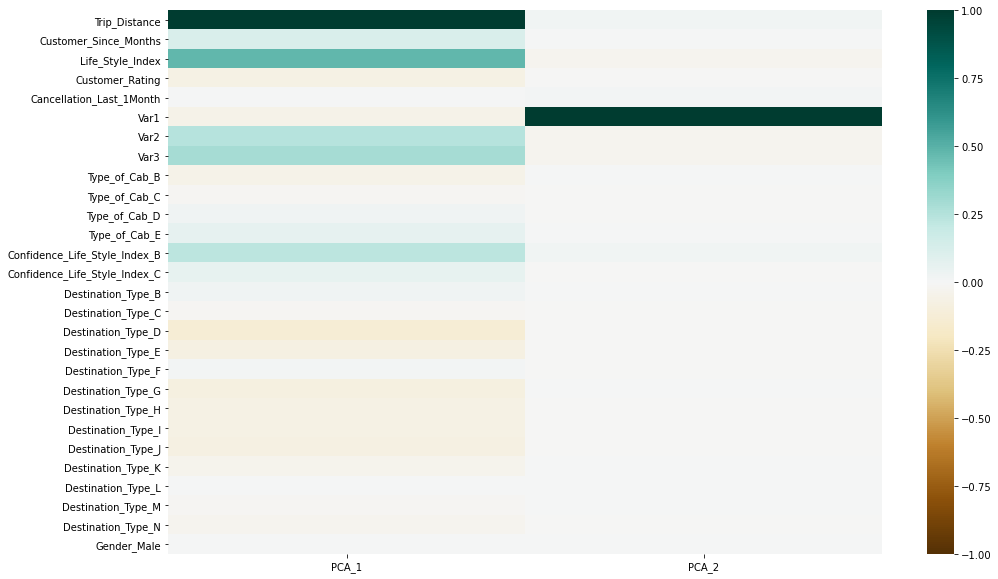

In [51]:
### Your code is here
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой? (2б)**

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

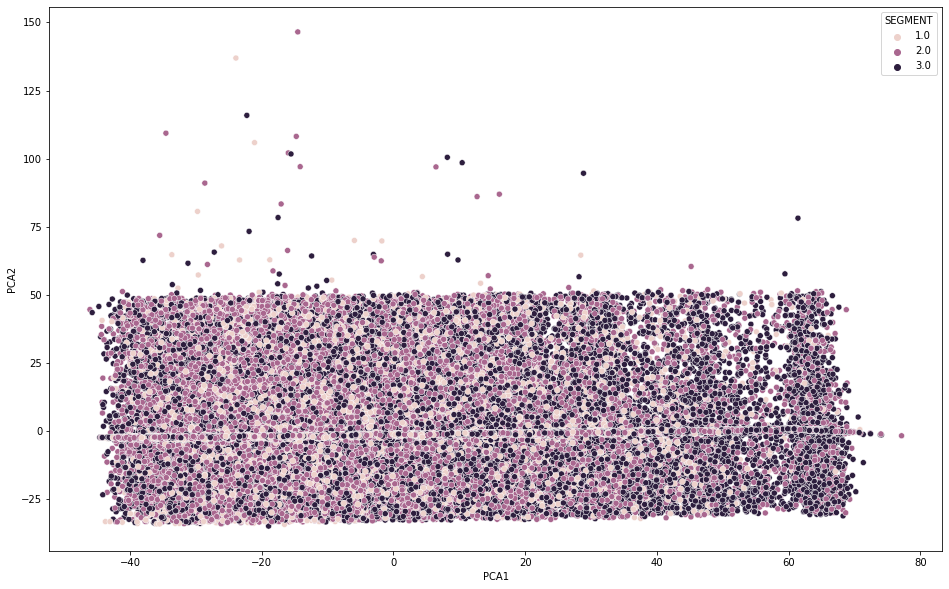

In [52]:
### Your code is here
PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'SEGMENT'])
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="SEGMENT")


In [53]:
pca_3d = PCA(n_components=3)

pca_3d.fit(X)

PCA_dataset_3d = pca_3d.transform(X)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [54]:
first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


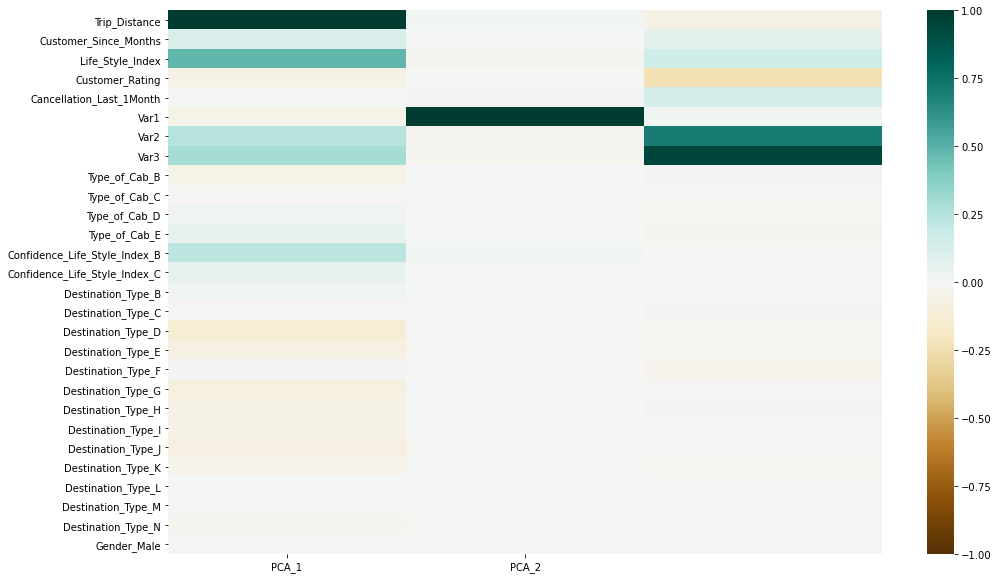

In [55]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [85]:
### Your code is here
PCA_dataset_3d.corr().round(16)


,PCA_1,PCA_2,PCA_3
PCA_1,1.0,0.0,-0.0
PCA_2,0.0,1.0,-0.0
PCA_3,-0.0,-0.0,1.0


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях (2б)**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [57]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [59]:
### Your code is here
import datetime
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}




In [60]:
pipePCA = Pipeline([('scaler', StandardScaler())
                 ,('PCA', PCA(n_components=2))
                 ,('model', LogisticRegression())])

begin_time = datetime.datetime.now()

search_pca = GridSearchCV(pipePCA, param_grid)


search_pca.fit(X_train, y_train)

print(f"Best parameter (CV score={search_pca.best_score_:.5f}):")
print(search_pca.best_params_)


Best parameter (CV score=0.48092):
{'model__C': 0.0001, 'model__penalty': 'l2'}


In [62]:
pipe = Pipeline([('scaler', StandardScaler())
                 ,('model', LogisticRegression())])

begin_time = datetime.datetime.now()

search = GridSearchCV(pipe, param_grid)


search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.68039):
{'model__C': 0.001, 'model__penalty': 'l2'}


In [67]:
print('_PCA_'*12)
print(classification_report(y_test, search_pca.predict(X_test), digits=3))
print('-'*60)
print('_LR_'*15)
print(classification_report(y_test, search.predict(X_test), digits=3))


_PCA__PCA__PCA__PCA__PCA__PCA__PCA__PCA__PCA__PCA__PCA__PCA_
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333

------------------------------------------------------------
_LR__LR__LR__LR__LR__LR__LR__LR__LR__LR__LR__LR__LR__LR__LR_
              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую (2б)**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [70]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [71]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)
    
    

CPU times: user 3min 20s, sys: 10.2 s, total: 3min 30s
Wall time: 2min 52s


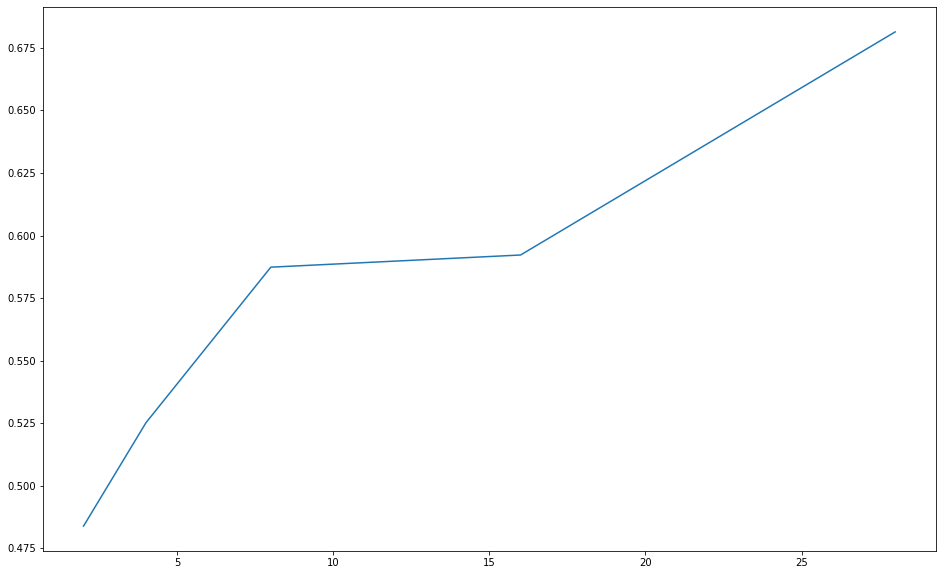

In [72]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(accuracy_dict.keys(), accuracy_dict.values())

plt.show()

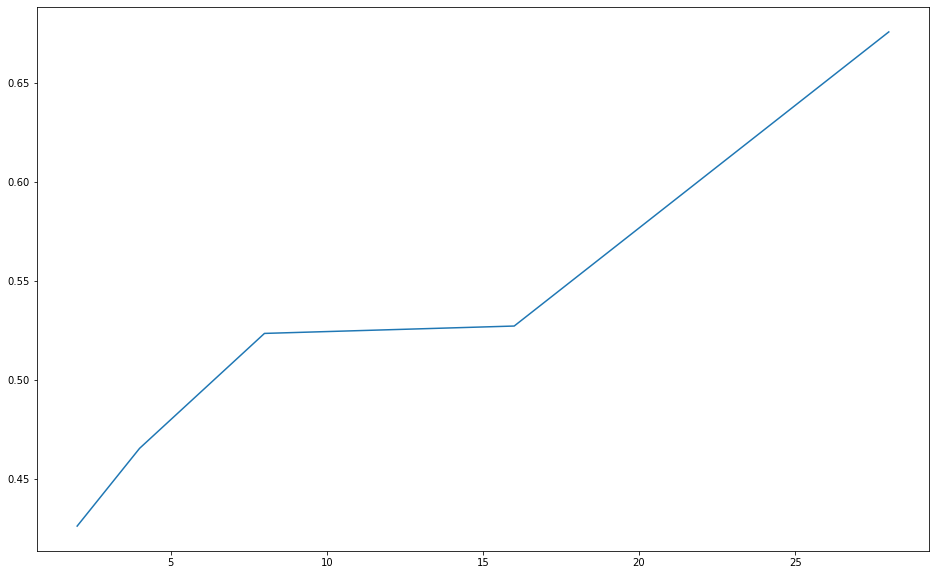

In [73]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(f1_score_dict.keys(), f1_score_dict.values())

plt.show()

In [77]:
round(f1_score_dict[28],3)

0.676

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne
X_tsne = np.concatenate((X_tsne, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

In [ ]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [ ]:
### Your code is here
X_tsne3 = TSNE(n_components=3).fit_transform(X)

X_tsne3
X_tsne3 = np.concatenate((X_tsne3, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne3 = pd.DataFrame(X_tsne3, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'Tsne_3nd_component',
                                       'SEGMENT'])


In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                      ['orange', 'green', 'red', 'blue'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!